In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import textstat
from textblob import TextBlob
import statsmodels.formula.api as smf

In [2]:
# Set the path to the dataset
dataset_path = '../../datasets/TruthSeeker2023/Truth_Seeker_Model_Dataset.csv'

# Load the dataset into a pandas dataframe, ensuring the header is inferred from the first row
df = pd.read_csv(dataset_path, header=0)

# Display the first five rows of the dataframe to inspect it
df.head(5)

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree


In [3]:
# First, eliminate from the dataframe every row that has in the corresponding column the value of NO MAJORITY, or the value of unrelated.
df = df[(df['5_label_majority_answer'] != 'NO MAJORITY') & (df['3_label_majority_answer'] != 'unrelated')]

# Function to calculate categorical_label
def calculate_categorical_label(row):
    label = row['3_label_majority_answer'].lower()  # convert to lowercase
    if row['target'] == True and label == 'agree':
        return True
    elif row['target'] == True and label == 'disagree':
        return False
    elif row['target'] == False and label == 'agree':
        return False
    elif row['target'] == False and label == 'disagree':
        return True

# Apply the function to the dataframe
df['categorical_label'] = df.apply(calculate_categorical_label, axis=1)

# Create BinaryNumLabel column
df['BinaryNumLabel'] = df['categorical_label'].apply(lambda x: 1.0 if x == True else 0.0)

df.head(5)

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer,categorical_label,BinaryNumLabel
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree,True,1.0
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree,True,1.0
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree,True,1.0
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree,True,1.0
5,5,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium","I've said this before, but it really is incred...",Agree,Agree,True,1.0


In [4]:
import re


# Preprocessing
def preprocess_tweet(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r"http\\S+|www\\S+|https\\S+", '', text, flags=re.MULTILINE)  # remove urls
    text = re.sub(r'\\@\\w+|\\#','', text)  # remove mentions and hashtags
    return text

df['processed_tweet'] = df['tweet'].apply(preprocess_tweet)

In [15]:

# Calculate Flesch-Kincaid Grade Level score and add as a new column
df["Readability_Score"] = df['processed_tweet'].apply(textstat.flesch_kincaid_grade)

# Sentiment Analysis using TextBlob polarity score, range [-1, 1], from negative sentiment to positive sentiment
df["Sentiment_Polarity"] = df['processed_tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sentiment Analysis using TextBlob subjectivity score, range [0, 1], from low subjectivity to high subjectivity
df["Sentiment_Subjectivity"] = df['processed_tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Display the preprocessed dataset
df.head()

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer,categorical_label,BinaryNumLabel,processed_tweet,Readability_Score,Sentiment_Polarity,Sentiment_Subjetivity,Sentiment_Subjectivity
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree,True,1.0,@potus biden blunders - 6 month update\n\ninfl...,8.3,0.500000,0.500000,0.500000
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree,True,1.0,the supreme court is siding with super rich pr...,10.1,0.206667,0.603333,0.603333
3,3,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders\n\nBroken campaign promi...,Mostly Agree,Agree,True,1.0,@potus biden blunders\n\nbroken campaign promi...,11.6,-0.400000,0.400000,0.400000
4,4,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@OhComfy I agree. The confluence of events rig...,Agree,Agree,True,1.0,@ohcomfy i agree. the confluence of events rig...,10.2,0.442857,0.717857,0.717857
5,5,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium","I've said this before, but it really is incred...",Agree,Agree,True,1.0,"i've said this before, but it really is incred...",19.7,0.187500,0.475000,0.475000


In [16]:
log_reg_readscr_predic = smf.logit("BinaryNumLabel ~ Readability_Score", data=df).fit()

# Display the logistic regression summary
print("\nBinaryNumLabel ~ Readability_Score")
print(log_reg_readscr_predic.summary())

Optimization terminated successfully.
         Current function value: 0.692398
         Iterations 4

BinaryNumLabel ~ Readability_Score
                           Logit Regression Results                           
Dep. Variable:         BinaryNumLabel   No. Observations:               111593
Model:                          Logit   Df Residuals:                   111591
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Jul 2024   Pseudo R-squ.:               0.0004640
Time:                        16:20:33   Log-Likelihood:                -77267.
converged:                       True   LL-Null:                       -77303.
Covariance Type:            nonrobust   LLR p-value:                 2.464e-17
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0382      0.013     -2.932      0.

In [17]:
log_reg_sentpol_predic = smf.logit("BinaryNumLabel ~ Sentiment_Polarity", data=df).fit()

# Display the logistic regression summary
print("\nBinaryNumLabel ~ Sentiment_Polarity")
print(log_reg_sentpol_predic.summary())

Optimization terminated successfully.
         Current function value: 0.691530
         Iterations 4

BinaryNumLabel ~ Sentiment_Polarity
                           Logit Regression Results                           
Dep. Variable:         BinaryNumLabel   No. Observations:               111593
Model:                          Logit   Df Residuals:                   111591
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Jul 2024   Pseudo R-squ.:                0.001716
Time:                        16:20:33   Log-Likelihood:                -77170.
converged:                       True   LL-Null:                       -77303.
Covariance Type:            nonrobust   LLR p-value:                 1.159e-59
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0361      0.006      5.866    

In [18]:
log_reg_sentsubj_predic = smf.logit("BinaryNumLabel ~ Sentiment_Subjectivity", data=df).fit()

# Display the logistic regression summary
print("\nBinaryNumLabel ~ Sentiment_Subjectivity")
print(log_reg_sentsubj_predic.summary())

Optimization terminated successfully.
         Current function value: 0.691605
         Iterations 4

BinaryNumLabel ~ Sentiment_Subjectivity
                           Logit Regression Results                           
Dep. Variable:         BinaryNumLabel   No. Observations:               111593
Model:                          Logit   Df Residuals:                   111591
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Jul 2024   Pseudo R-squ.:                0.001608
Time:                        16:20:34   Log-Likelihood:                -77178.
converged:                       True   LL-Null:                       -77303.
Covariance Type:            nonrobust   LLR p-value:                 5.267e-56
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.2044      0.01

In [19]:
log_reg_multi_predic = smf.logit("BinaryNumLabel ~ Readability_Score + Sentiment_Polarity + Sentiment_Subjectivity", data=df).fit()

print("\nBinaryNumLabel ~ Readability_Score + Sentiment_Polarity + Sentiment_Subjectivity")
print(log_reg_multi_predic.summary())


Optimization terminated successfully.
         Current function value: 0.689862
         Iterations 4

BinaryNumLabel ~ Readability_Score + Sentiment_Polarity + Sentiment_Subjectivity
                           Logit Regression Results                           
Dep. Variable:         BinaryNumLabel   No. Observations:               111593
Model:                          Logit   Df Residuals:                   111589
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Jul 2024   Pseudo R-squ.:                0.004124
Time:                        16:20:34   Log-Likelihood:                -76984.
converged:                       True   LL-Null:                       -77303.
Covariance Type:            nonrobust   LLR p-value:                7.243e-138
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
In

In [20]:
log_reg_inter_predic = smf.logit("BinaryNumLabel ~ Readability_Score * Sentiment_Polarity", data=df).fit()

print("\nBinaryNumLabel ~ Readability_Score * Sentiment_Polarity")
print(log_reg_inter_predic.summary())


Optimization terminated successfully.
         Current function value: 0.691078
         Iterations 4

BinaryNumLabel ~ Readability_Score * Sentiment_Polarity
                           Logit Regression Results                           
Dep. Variable:         BinaryNumLabel   No. Observations:               111593
Model:                          Logit   Df Residuals:                   111589
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Jul 2024   Pseudo R-squ.:                0.002368
Time:                        16:20:34   Log-Likelihood:                -77120.
converged:                       True   LL-Null:                       -77303.
Covariance Type:            nonrobust   LLR p-value:                 4.706e-79
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [21]:
log_reg_inter_predic = smf.logit("BinaryNumLabel ~ Readability_Score * Sentiment_Subjectivity", data=df).fit()

print("\nBinaryNumLabel ~ Readability_Score * Sentiment_Subjectivity")
print(log_reg_inter_predic.summary())

Optimization terminated successfully.
         Current function value: 0.691241
         Iterations 4

BinaryNumLabel ~ Readability_Score * Sentiment_Subjectivity
                           Logit Regression Results                           
Dep. Variable:         BinaryNumLabel   No. Observations:               111593
Model:                          Logit   Df Residuals:                   111589
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Jul 2024   Pseudo R-squ.:                0.002133
Time:                        16:20:35   Log-Likelihood:                -77138.
converged:                       True   LL-Null:                       -77303.
Covariance Type:            nonrobust   LLR p-value:                 3.503e-71
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [22]:
log_reg_inter_predic = smf.logit("BinaryNumLabel ~ Sentiment_Polarity * Sentiment_Subjectivity", data=df).fit()

print("\nBinaryNumLabel ~ Sentiment_Polarity * Sentiment_Subjectivity")
print(log_reg_inter_predic.summary())

Optimization terminated successfully.
         Current function value: 0.689547
         Iterations 4

BinaryNumLabel ~ Sentiment_Polarity * Sentiment_Subjectivity
                           Logit Regression Results                           
Dep. Variable:         BinaryNumLabel   No. Observations:               111593
Model:                          Logit   Df Residuals:                   111589
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Jul 2024   Pseudo R-squ.:                0.004580
Time:                        16:20:35   Log-Likelihood:                -76949.
converged:                       True   LL-Null:                       -77303.
Covariance Type:            nonrobust   LLR p-value:                3.823e-153
                                                coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [23]:
log_reg_inter_predic = smf.logit("BinaryNumLabel ~ Sentiment_Polarity + Sentiment_Subjectivity + Sentiment_Polarity * Sentiment_Subjectivity", data=df).fit()

print("\nBinaryNumLabel ~ Sentiment_Polarity + Sentiment_Subjectivity + Sentiment_Polarity * Sentiment_Subjectivity")
print(log_reg_inter_predic.summary())

Optimization terminated successfully.
         Current function value: 0.689547
         Iterations 4

BinaryNumLabel ~ Sentiment_Polarity + Sentiment_Subjectivity + Sentiment_Polarity * Sentiment_Subjectivity
                           Logit Regression Results                           
Dep. Variable:         BinaryNumLabel   No. Observations:               111593
Model:                          Logit   Df Residuals:                   111589
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Jul 2024   Pseudo R-squ.:                0.004580
Time:                        16:20:35   Log-Likelihood:                -76949.
converged:                       True   LL-Null:                       -77303.
Covariance Type:            nonrobust   LLR p-value:                3.823e-153
                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy.sparse import hstack
import seaborn as sns

# Define predictors and target
X_text = df['processed_tweet']
X_sentiment = df[['Sentiment_Polarity', 'Sentiment_Subjectivity']]
y = df['BinaryNumLabel']

# Vectorize the tweet text
vectorizer = TfidfVectorizer(max_features=1000)
X_text = vectorizer.fit_transform(X_text)

# Combine the text features with the sentiment scores
X = hstack((X_text, X_sentiment))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.93      0.90      0.92     10774
         1.0       0.91      0.94      0.92     11545

    accuracy                           0.92     22319
   macro avg       0.92      0.92      0.92     22319
weighted avg       0.92      0.92      0.92     22319



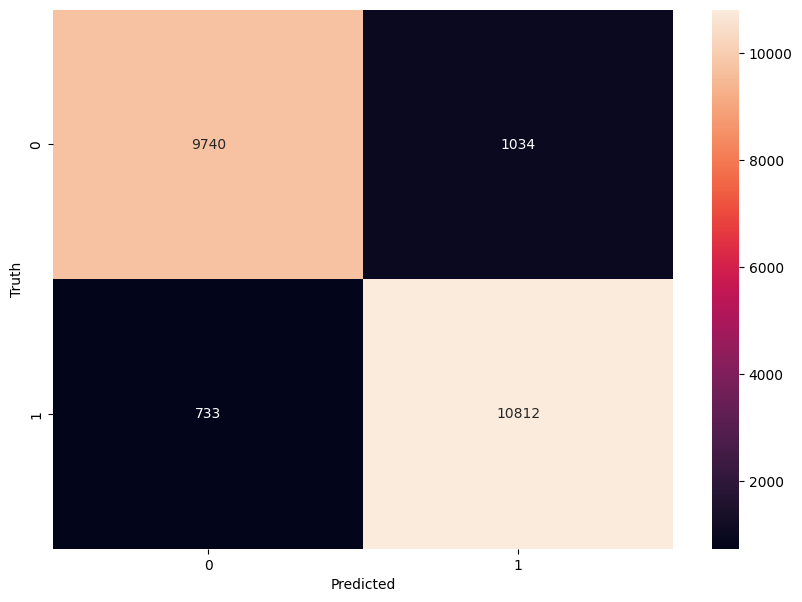

In [25]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()